In [44]:
from bs4 import BeautifulSoup

import requests
import pandas as pd
import time, os
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score
import numpy as np

import random

In [9]:
# Where I got my data from

url = "https://twitchtracker.com/channels/viewership?page="

page_list = []
avg_viewers = []
time_streamed = []
max_viewers = []
hours_watched = []
total_views = []


for count in range(1, 101):
    page_list.append(url + str(count))
    


In [11]:
# This prints out every page I load so I know which pages I have currently

for page in page_list:
    headers = {'User-Agent': 'Mozilla/5.0'}
    r = requests.get(url, headers=headers)
    soup = BeautifulSoup(r.text, 'lxml')
    time.sleep(1)
    print(page)
    
    table = soup.find('table', attrs={'id': 'channels'})
    time.sleep(1)
    rows = [row for row in table.find_all('tr')]

    for row in rows[1:11]:

        avg_viewers.append(row.find(class_='color-viewers').text)
        max_viewers.append(row.find(class_='color-viewersMax').text)
        hours_watched.append(row.find(class_='color-watched').text)
        total_views.append(row.find(class_='color-views hidden-sm').text)
        t_s = (row.find(class_='color-streamed').text)[:-5]
        time_streamed.append(t_s)
    
    time.sleep(1)



https://twitchtracker.com/channels/viewership?page=1
https://twitchtracker.com/channels/viewership?page=2
https://twitchtracker.com/channels/viewership?page=3
https://twitchtracker.com/channels/viewership?page=4
https://twitchtracker.com/channels/viewership?page=5
https://twitchtracker.com/channels/viewership?page=6
https://twitchtracker.com/channels/viewership?page=7
https://twitchtracker.com/channels/viewership?page=8
https://twitchtracker.com/channels/viewership?page=9
https://twitchtracker.com/channels/viewership?page=10
https://twitchtracker.com/channels/viewership?page=11
https://twitchtracker.com/channels/viewership?page=12
https://twitchtracker.com/channels/viewership?page=13
https://twitchtracker.com/channels/viewership?page=14
https://twitchtracker.com/channels/viewership?page=15
https://twitchtracker.com/channels/viewership?page=16
https://twitchtracker.com/channels/viewership?page=17
https://twitchtracker.com/channels/viewership?page=18
https://twitchtracker.com/channels/vi

In [16]:
# Sanity check

print(time_streamed)
print(hours_watched)

['19.9', '91.9', '35.1', '28.3', '109', '147.9', '112.9', '45', '331.6', '32.4', '19.9', '91.9', '35.1', '28.3', '109', '147.9', '112.9', '45', '331.6', '32.4', '19.9', '91.9', '35.1', '28.3', '109', '147.9', '112.9', '45', '331.6', '32.4', '19.9', '91.9', '35.1', '28.3', '109', '147.9', '112.9', '45', '331.6', '32.4', '19.9', '91.9', '35.1', '28.3', '109', '147.9', '112.9', '45', '331.6', '32.4', '19.9', '91.9', '35.1', '28.3', '109', '147.9', '112.9', '45', '331.6', '32.4', '19.9', '91.9', '35.1', '28.3', '109', '147.9', '112.9', '45', '331.6', '32.4', '19.9', '91.9', '35.1', '28.3', '109', '147.9', '112.9', '45', '331.6', '32.4', '19.9', '91.9', '35.1', '28.3', '109', '147.9', '112.9', '45', '331.6', '32.4', '19.9', '91.9', '35.1', '28.3', '109', '147.9', '112.9', '45', '331.6', '32.4', '19.9', '91.9', '35.1', '28.3', '109', '147.9', '112.9', '45', '331.6', '32.4', '19.9', '91.9', '35.1', '28.3', '109', '147.9', '112.9', '45', '331.6', '32.4', '19.9', '91.9', '35.1', '28.3', '109', 

In [23]:
# Creating the data frame

d = {'avg viewers': avg_viewers, 'max viewers': max_viewers, 'time streamed': time_streamed,
     'hours watched': hours_watched, 'total views': total_views}

df = pd.DataFrame(data=d)
df.head(30)

,avg viewers,max viewers,time streamed,hours watched,total views
0,229923,650237,19.9,4579292,27951316
1,154878,313347,91.9,14230743,97827900
2,98676,202526,35.1,3465181,12587143
3,92858,160297,28.3,2623229,8903718
4,87738,344676,109,9563496,136116803
5,86366,2470347,147.9,12770707,104862411
6,81938,533239,112.9,9250758,136131459
7,80411,365983,45,3615814,213139886
8,79765,222720,331.6,26447481,261126638
9,73227,157820,32.4,2368880,55930824


In [24]:
# Changing the string data into usable stuff

df = df.astype('float')

In [25]:
# Data frame correlation for the heat map

df.corr()

,avg viewers,max viewers,time streamed,hours watched,total views
avg viewers,1.000000,0.003782,-0.307192,-0.108305,-0.389536
max viewers,0.003782,1.000000,0.161023,0.163672,0.008774
time streamed,-0.307192,0.161023,1.000000,0.958130,0.747271
hours watched,-0.108305,0.163672,0.958130,1.000000,0.685132
total views,-0.389536,0.008774,0.747271,0.685132,1.000000


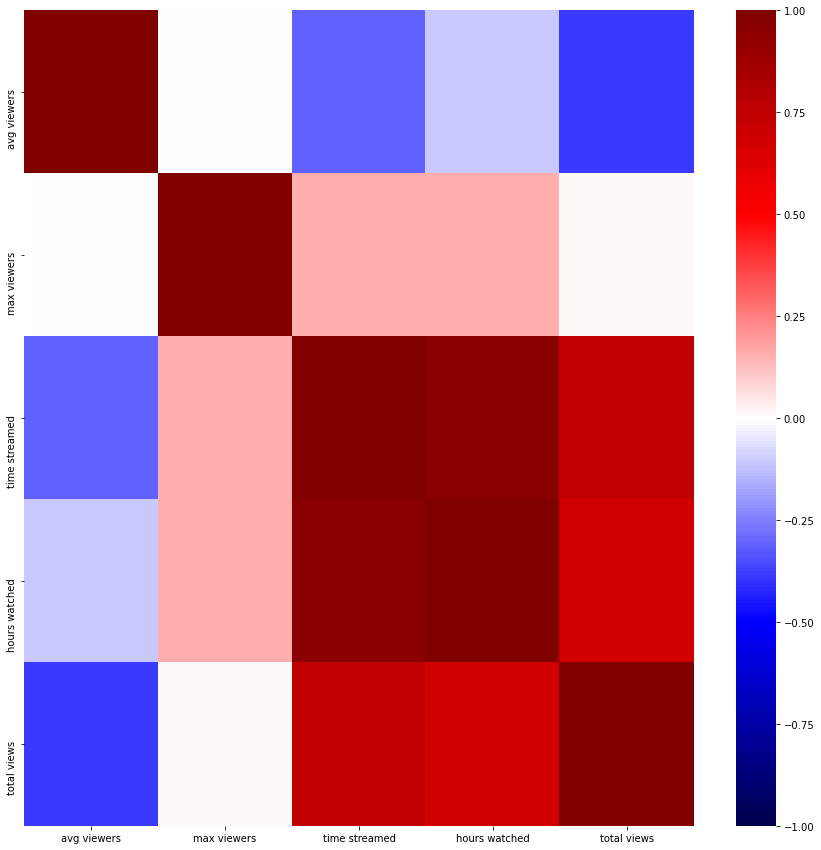

In [26]:
# The heat map

fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(), cmap="seismic", vmin=-1, vmax=1, ax=ax);

<ipython-input-31-b23938873e5e>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  pd.plotting.scatter_matrix(df[df.columns[:]], ax=ax);


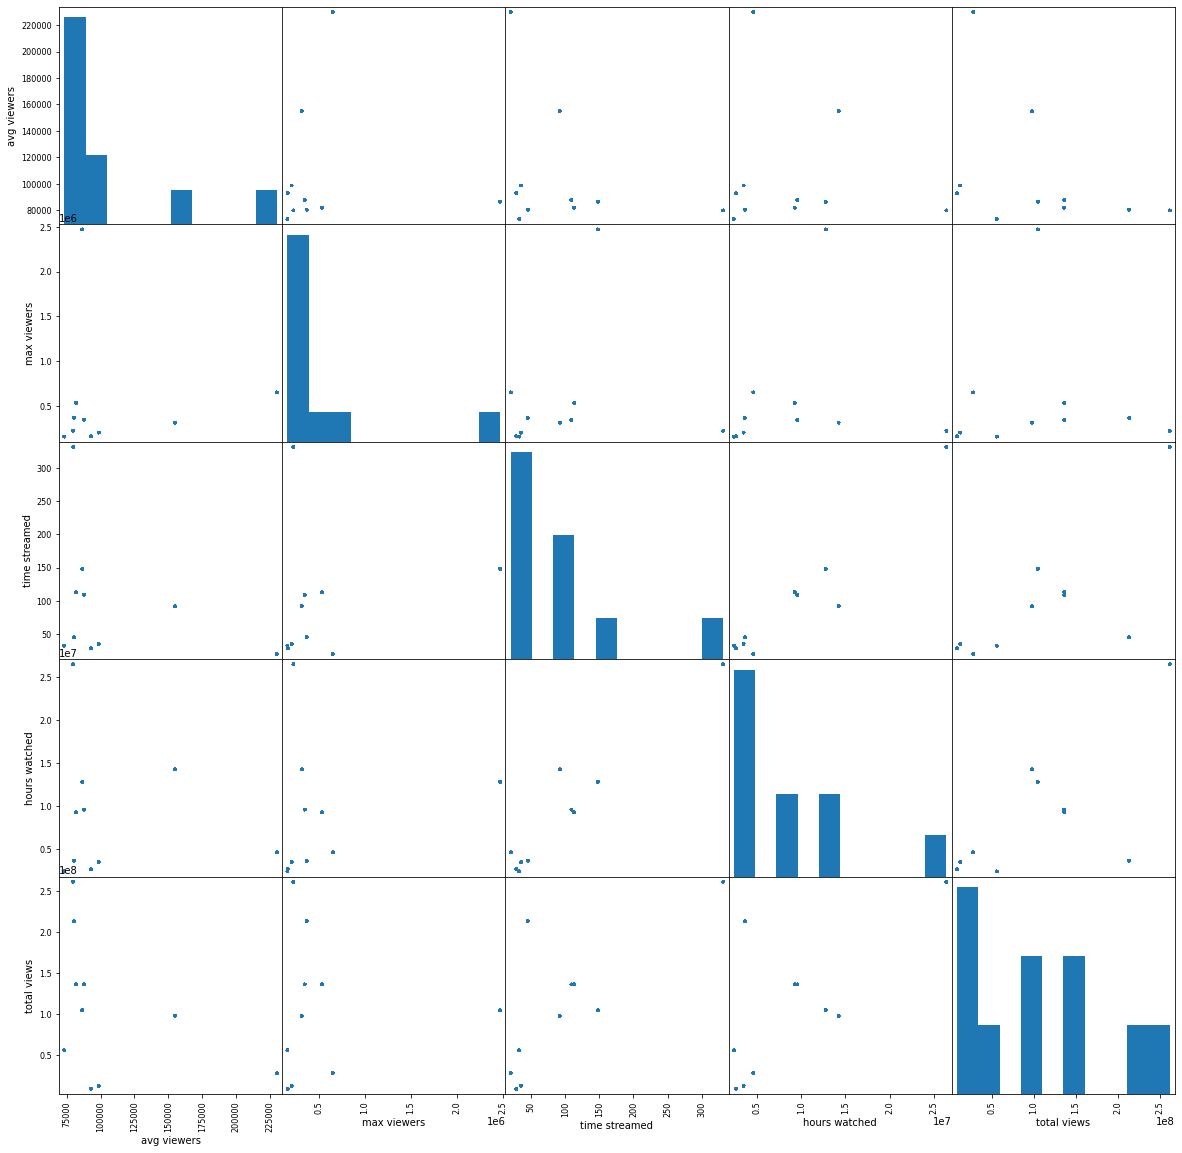

In [31]:
# Pair plot number 1

fig, ax = plt.subplots(figsize=(20, 20))
pd.plotting.scatter_matrix(df[df.columns[:]], ax=ax);

In [32]:
# Double checking how many rows I have

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1630 entries, 0 to 1629
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   avg viewers    1630 non-null   float64
 1   max viewers    1630 non-null   float64
 2   time streamed  1630 non-null   float64
 3   hours watched  1630 non-null   float64
 4   total views    1630 non-null   float64
dtypes: float64(5)
memory usage: 63.8 KB


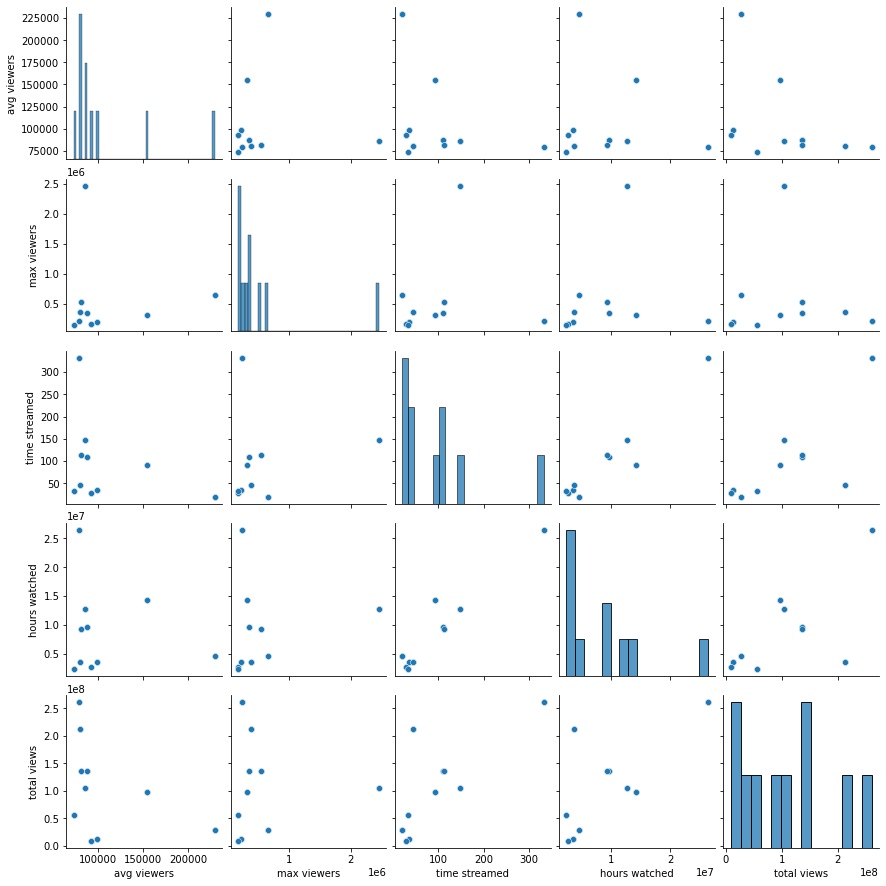

In [33]:
# Pair plot number 2

sns.pairplot(df)

In [34]:
X = df.loc[:,['max viewers', 'time streamed', 'hours watched', 
                      'total views']]

y = df['avg viewers']

In [37]:
# Training and tesitng

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

In [40]:
selected_columns = ['max viewers', 'time streamed', 'hours watched', 
                      'total views']

In [58]:
lasso_model = Lasso(alpha = 10) 
lasso_model.fit(X_train.loc[:,selected_columns], y_train)

Lasso(alpha=10)

In [59]:
list(zip(selected_columns, lasso_model.coef_))

[('max viewers', -0.00036424894007018046),
 ('time streamed', -1161.3094055825748),
 ('hours watched', 0.014193724757263453),
 ('total views', -0.00011987267507789932)]

In [67]:
lr_model_ridge = Ridge(alpha = 20)
lr_model_ridge.fit(X_train_collinear, y_train)

list(zip(X_train_collinear.columns, lr_model_ridge.coef_))

[('max viewers', -0.00036432162580677887),
 ('time streamed', -1161.2829605111842),
 ('hours watched', 0.014193443740500253),
 ('total views', -0.00011987768810597577)]

In [68]:
test_set_pred = lasso_model.predict(X_test.loc[:,selected_columns])

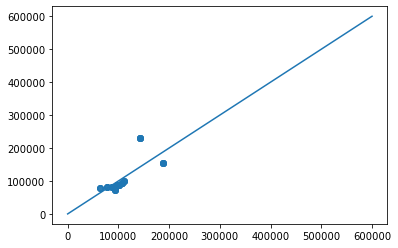

In [65]:
plt.scatter(test_set_pred, y_test, alpha=.1)
plt.plot(np.linspace(0,600000,1000), np.linspace(0,600000,1000))

In [66]:
r2_score(y_test, test_set_pred)

0.5225107295636293

In [51]:
# Mean absolute error

def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

mae(y_test, test_set_pred)

34403.99113169716

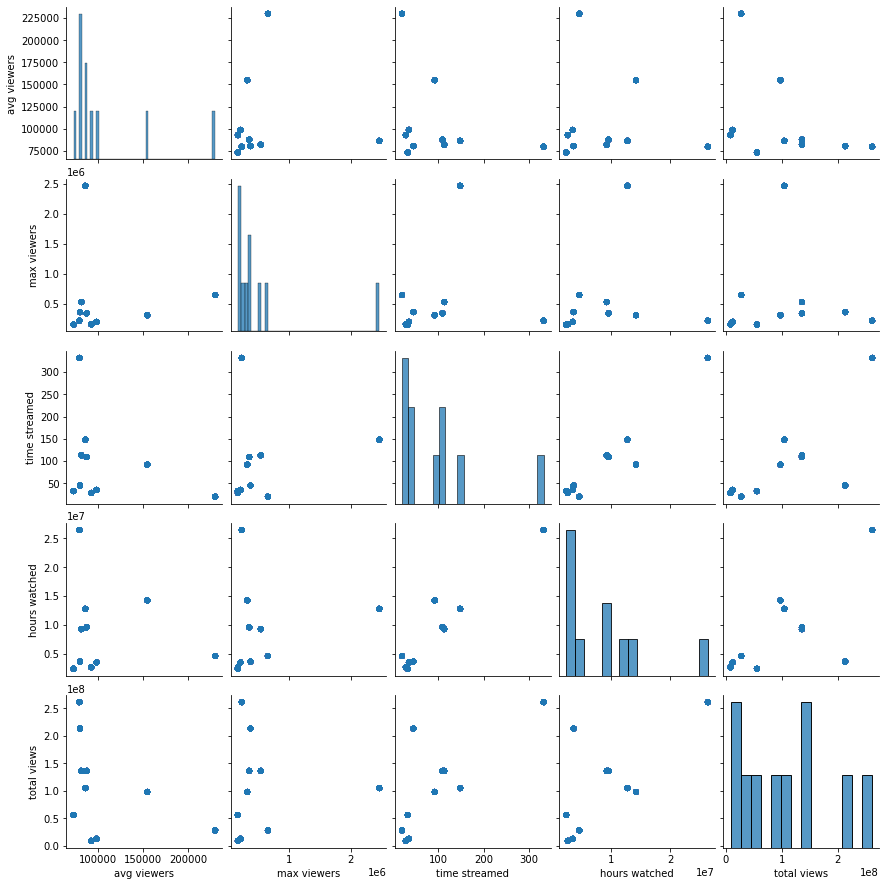

In [53]:
sns.pairplot(df, plot_kws=dict(alpha=.1, edgecolor='none'))

In [54]:
def split_and_validate(X, y):
    # 80/20 train/val split, 
    
    # train/val split
    X_train, X_val, y_train, y_val = \
        train_test_split(X, y, test_size=0.2, random_state=42)
    
    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    # score fit model on validation data
    val_score = lr_model.score(X_val, y_val)
    
    print('\nValidation R^2 score was:', val_score)
    print('Feature coefficient results: \n')
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}') 

In [55]:
split_and_validate(X, y)


Validation R^2 score was: 0.5224999221416957
Feature coefficient results: 

max viewers : 0.00
time streamed : -1169.20
hours watched : 0.01
total views : -0.00
